In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from scipy.stats import multivariate_normal

In [47]:
def create_data():
    iris = load_iris()
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df['label'] = iris.target
    df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
    data = np.array(df.iloc[:100, [0, 1, -1]])
    return data[:,:2], data[:,-1]

In [48]:
X, y = create_data()

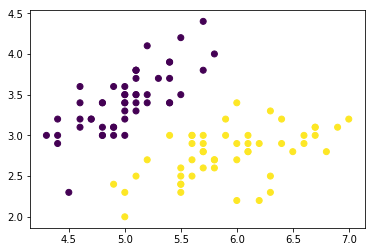

In [49]:
plt.scatter(X[:,0],X[:,1],c=y)   ###s是大小，marker是形状

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
m,n = X_train.shape
w,b = np.zeros((1,n)),0

In [52]:
Z = np.dot(w,X_train.T) + b

In [53]:
def sigmod (Z):
    return 1./(1.+np.exp(-Z))

In [54]:
A = sigmod(Z)

In [55]:
loss = -np.sum(y_train*np.log(A) + (1-y_train)*np.log(1-A)) / m
loss

0.6931471805599453

In [56]:
dZ = A-y_train
dw = np.dot(dZ,X_train) / m
db = np.sum(dZ,axis=1,keepdims=True)

In [57]:
w = w - 0.1*dw
b = b - 0.1*db

In [58]:
Z = np.dot(w,X_train.T) + b
A = sigmod(Z)
loss = -np.sum(y_train*np.log(A) + (1-y_train)*np.log(1-A)) / m
loss

0.6916072125659777

In [62]:
def LR(X_train,y_train,alpha,iter):
    m,n = X_train.shape
    w,b = np.zeros((1,n)),0
    cost = []
    
    for i in range(iter):
        Z = np.dot(w,X_train.T) + b
        A = sigmod(Z)
        loss = -np.sum(np.multiply(y_train,np.log(A)) + np.multiply((1-y_train),np.log(1-A))) / m
        cost.append(loss)
        dZ = A - y_train
        dw = np.dot(dZ,X_train) / m
        db = np.sum(dZ,axis=1,keepdims=True) / m
        w = w - alpha*dw
        b = b - alpha*db
        
    plt.plot(cost)
    plt.show()
    return w,b

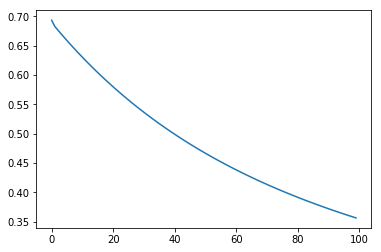

(array([[ 0.92367918, -1.53302317]]), array([[-0.15157801]]))

In [73]:
w,b= LR(X_train,y_train,0.1,100)
w,b

In [74]:
def Predict(X,y,w,b):

    Z = np.dot(w,X.T) + b
    A = sigmod(Z)
    
    predict_y = np.round(A) 
    
    correct_rate = np.sum((predict_y==y))/y.shape[0]
    
    return correct_rate

In [75]:
correct_rate = Predict(X_test,y_test,w,b)
print(correct_rate)

1.0


In [76]:
correct_rate = Predict(X_train,y_train,w,b)
print(correct_rate)

0.9875


In [79]:
x_ = np.arange(4,7,0.1)   ##0.1步长（shift,tab)
y_ = (-w[:,0] * x_ -b) / w[:,1]

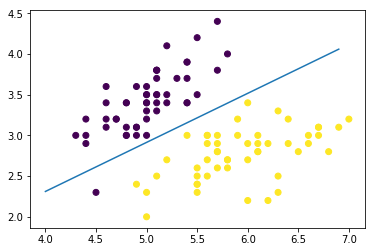

In [80]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.plot(x_,np.squeeze(y_))